## Title: Stores Sales Prediction

### Problem Statement
Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

### Aim
To build a solution that should able to predict the sales of the
different stores of Big Mart according to the provided dataset.

### Approach
The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing. We will try out different machine
learning algorithms that’s best fit for the above case.

###  Procedure
- Importing and checking the dataset
- EDA
- Feature Engineering
- Preprocessing
- Label Encoding
- One Hot Encoding
- Train Test Split
- Model Building
- Evaluation
- Conclusion

In [1]:
# Import Required Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Importing and checking the dataset

In [2]:
# Import the data
df = pd.read_csv('C:/Internship/Train.csv')

In [3]:
# First 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Last 5 rows
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


### Exploratory Data Analysis (EDA)

In [5]:
# Shape of data
df.shape

(8523, 12)

In [6]:
# Data type of attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# Statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Checking unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
# Checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We have null values in 2 columns,

Item_Weight - have 1463 null values and it is a numerical attribute

Outlet_Size - have 2410 null values and it is a categorical attribute.

In [10]:
# Checking for categorical attributes
cat_col =[]
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col                

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
# Removing unnecessary categorical attributes 
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Removing Item_Identifier and Outlet_Identifier because these are ID columns and doesnt contain any useful information

In [12]:
# Print the value_counts of categorical columns 
for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [13]:
# Fill the missing values
item_weight_mean = df.pivot_table(values='Item_Weight', index = 'Item_Identifier')
item_weight_mean                                 

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [14]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [15]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

In [16]:
df['Item_Weight'].isnull().sum()

0

In [17]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [18]:
miss_bool = df['Outlet_Size'].isnull()
df.loc[miss_bool, 'Outlet_Size'] = df.loc[miss_bool, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [19]:
df['Outlet_Size'].isnull().sum()

0

In [20]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [21]:
sum(df['Item_Visibility']==0)

526

In [22]:
# Replace zeroes with mean
df.loc[:, 'Item_Visibility'].replace([0], [df['Item_Visibility'].mean()],inplace=True)

In [23]:
sum(df['Item_Visibility']==0)

0

In [24]:
df['Item_Fat_Content']

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [26]:
# Combining the same columns 
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
# Creation of New Attributes
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [28]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df['New_Item_Type'].value_counts() 

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [29]:
 df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
 df['Item_Fat_Content'].value_counts()   

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [76]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


In [30]:
# Creat small values for establishment
df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']

In [31]:
df['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


### Visualization

#### So there are 3 types of Exploratoray data analysis

#### 1. Univariate Analysis

#### 2. Bivariate Analysis

#### 3. Multi-Variate Analysis

Lets do these analysis one by one


#### 1. Univariate Analysis : The univariate analysis basically tells us how data in each feature is distributed. just simple as below.

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

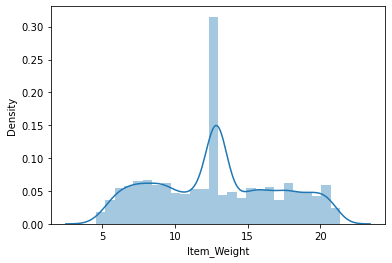

In [33]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

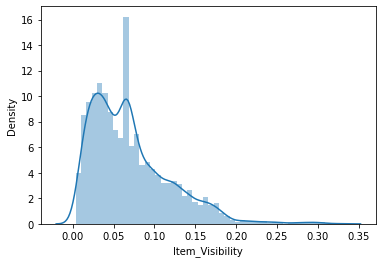

In [34]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

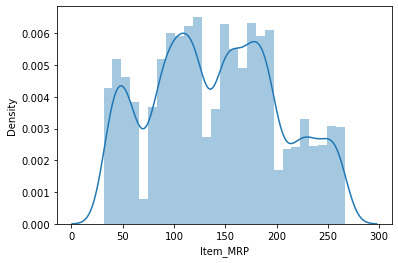

In [35]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

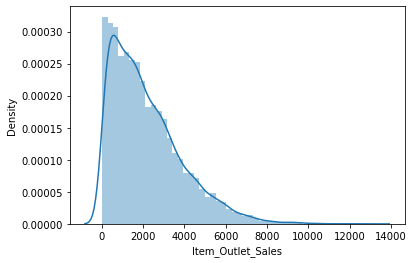

In [36]:
sns.distplot(df['Item_Outlet_Sales'])

In [37]:
# Log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

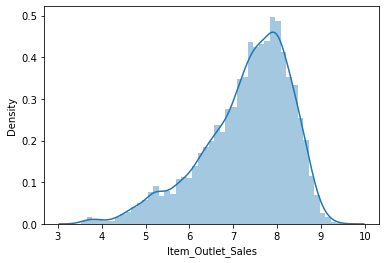

In [38]:
sns.distplot(df['Item_Outlet_Sales'])

### OBSERVATIONS:
#### 1. In Item_Weight dist there is a peak in between that is because we have change the NaN values with mean
#### 2. In Item_Visibility the values slightly right skewed and we can see the peak value in a single column that is because e have replaced the 0 with mean 
#### 3. In Item_MRP the MRP ranges from 30 to 260 we can also create bins like low price item high price item etc.
#### 4. In Item_Outlet_Sales the values are highly right skewed so we have to normalize it, we have used the log transformation to normalize it and after using log transformation the data is close to normal distribution

### 2. Bivariate Analysis : Means two variables or features are analyzed together, that how they are related to each other.

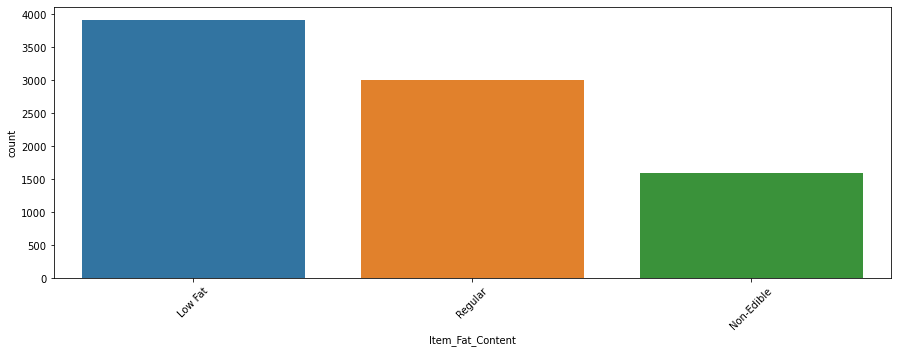

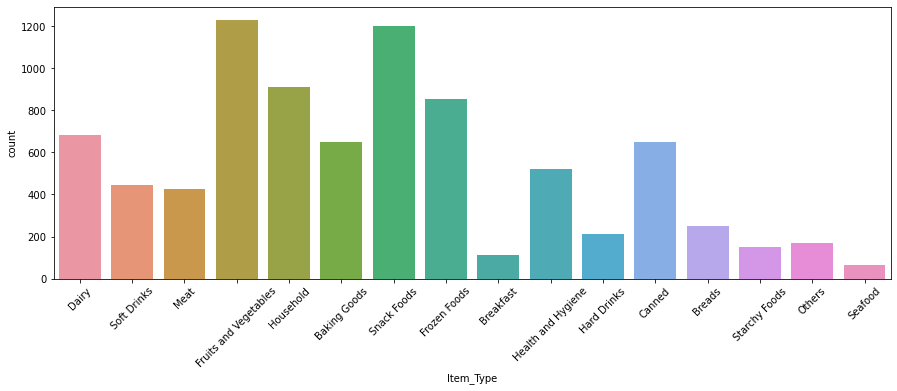

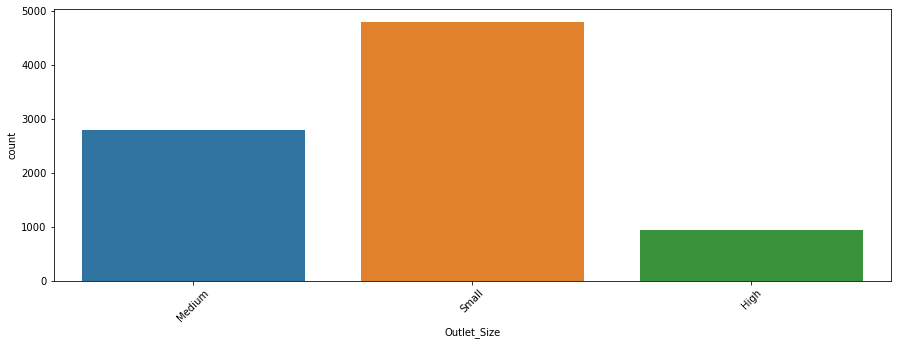

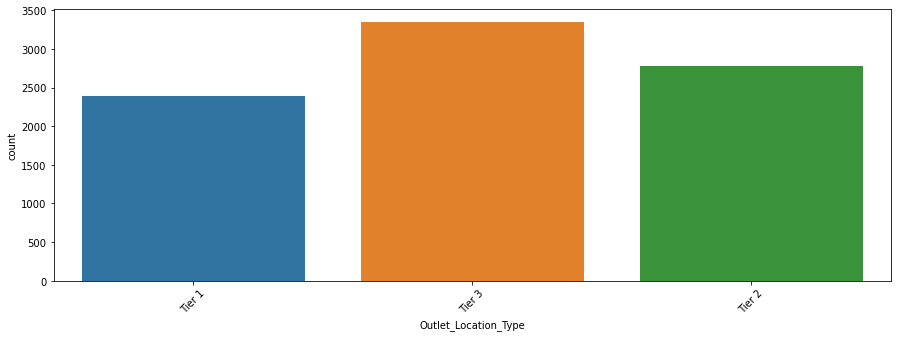

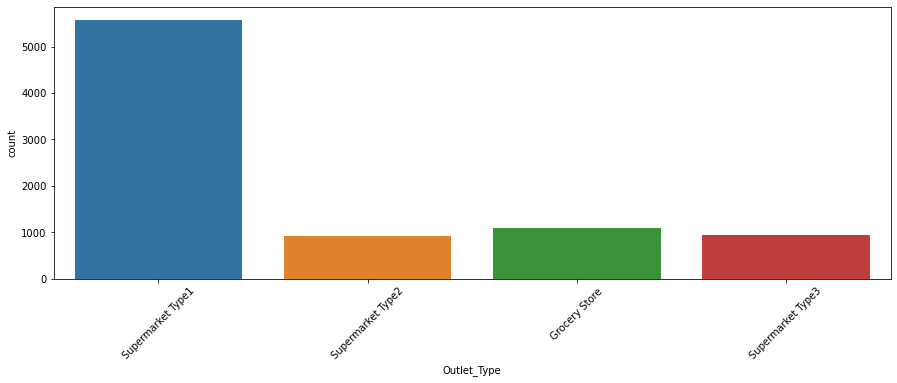

In [39]:
for i in cat_col:
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=45)
    sns.countplot(x=df[i]) 

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

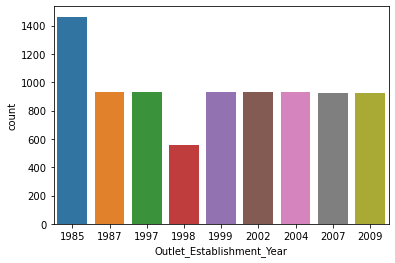

In [40]:
sns.countplot(df['Outlet_Establishment_Year'])

### Observations:
#### 1. For Item_Fat_Content we can observe that most of the product are of low fat and least are non-edible.
#### 2. Fruits and vegetables have the highest sales followed by snack food and sea food have the lowest sales count
#### 3. In outlet_location_Type Tier_3 has the highest count
#### 4. In outlet_Type Supermarket_Type1 has the highest count other types have almost the same count
#### 5. In Outlet_Establishment_Year highest no of stores has been established in 1985 other have almost same count only in 1998 count is least compare to others

### 3.Multi-variate Analysis: Means more than two variables or features are analyzed together, that how they are related to each other.

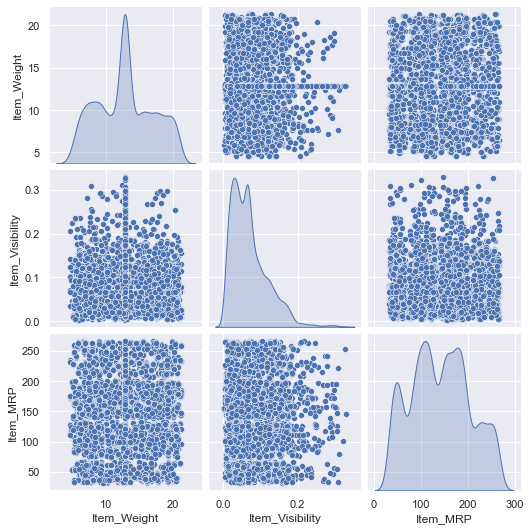

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde',palette='husl')  

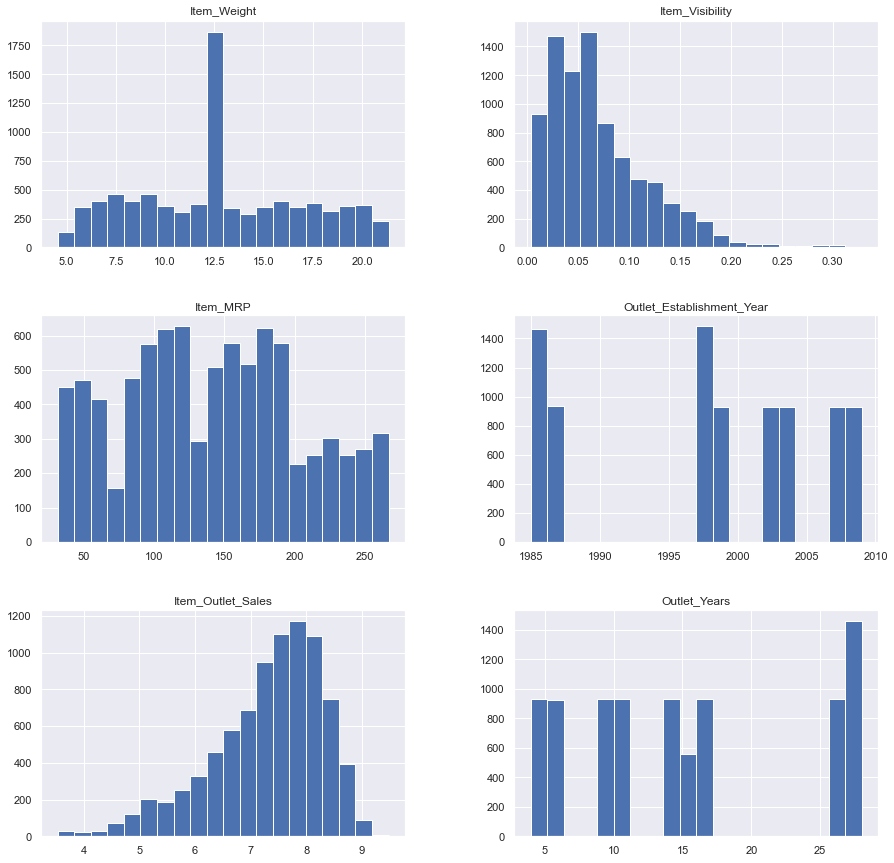

In [42]:
# Distribution of the variables
df.hist(figsize=(15,15),bins=20)
plt.show()

### Coorelation Matrix

<AxesSubplot:>

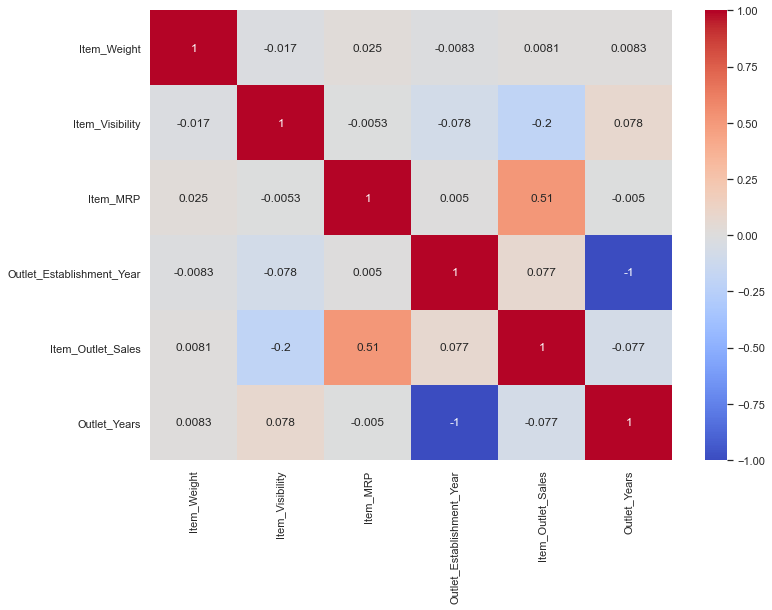

In [43]:
corr = df.corr()
sns.heatmap(corr, annot=True,cmap='coolwarm')

### Observations:
#### In above heatmap Item_Outlet_Sales and Item_MRP has the highest positive correlation of 0.51
#### Outlet_Years and Outlet_Establishment_Year has the highest negative correlation of -1 that is because we have derived the Outlet_Years value from Outlet_Establishment_Year


In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


###

### Preprocessing
#### Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])

#### Onehot Encoding

In [46]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,14,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,4,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,14,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,15,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,26,1,...,0,0,1,0,1,0,0,0,0,1


### Train-Test Split

In [47]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=101, test_size=0.2)

### Model Training

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from numpy import sqrt 
from sklearn.metrics import mean_squared_error
def train(model,X,y):
    # fit the model
    model.fit(X,y)
    
    # predict the training set
    pred = model.predict(X)
    mse = mean_squared_error(y,pred)
    rsme = sqrt(mse)

    
    # perform cross-validation
    cv_score = cross_val_score(model,X,y, scoring='neg_mean_squared_error',cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print('Model Report')
    print('MSE:', mean_squared_error(y,pred))
    print('RMSE', rsme)
    print('CV Score:',cv_score)

Model Report
MSE: 0.2880631931292632
RMSE 0.536715188092589
CV Score: 0.28902478392410724


<AxesSubplot:title={'center':'Model Coefficients'}>

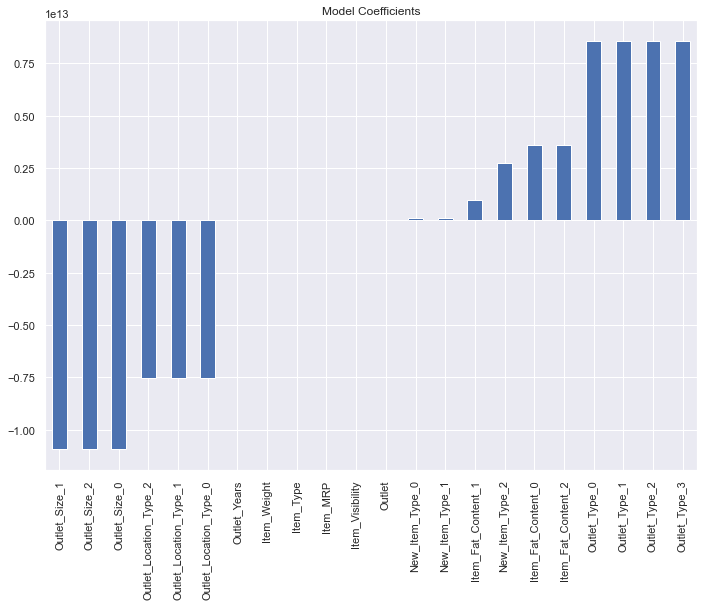

In [68]:
# Linear Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True) 
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 0.42802985605683735
RMSE 0.6542399071111739
CV Score: 0.42892892515626413


<AxesSubplot:title={'center':'Model Coefficients'}>

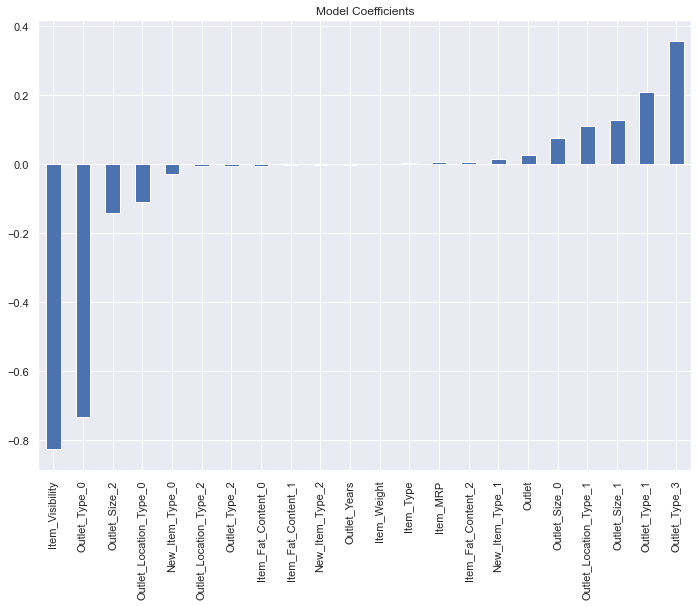

In [69]:
# Ridge Regression
model = Ridge(normalize=True) 
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 0.7628688679102087
RMSE 0.8734236474416116
CV Score: 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficients'}>

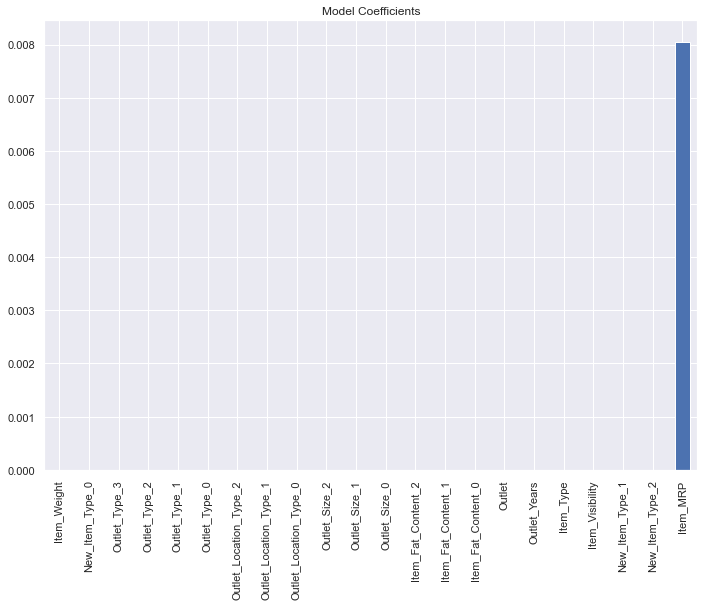

In [70]:
# Lasso Regression
model = Lasso() 
train(model,X,y)
coef = pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 2.7767015319289398e-34
RMSE 1.6663437616317167e-17
CV Score: 0.5717320364055049


<AxesSubplot:title={'center':'Feature Importances'}>

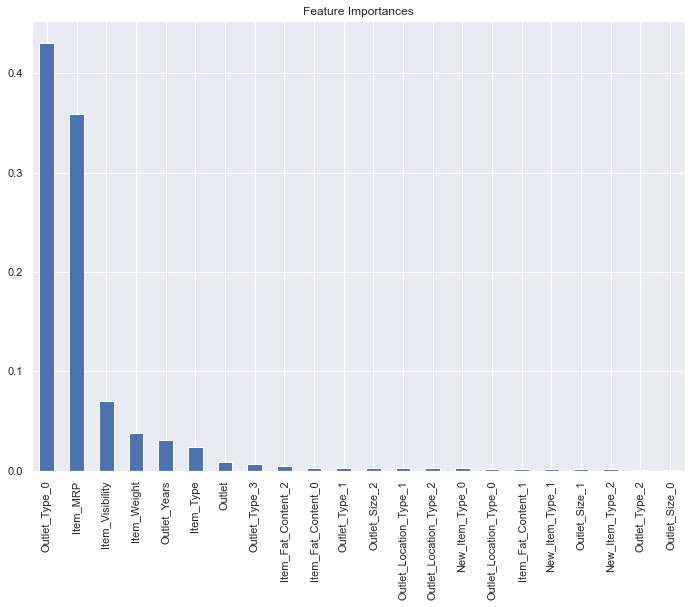

In [71]:
# DecisionTree Regression
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

Model Report
MSE: 0.04233839051182931
RMSE 0.20576294737349898
CV Score: 0.3095619993105398


<AxesSubplot:title={'center':'Feature Importances'}>

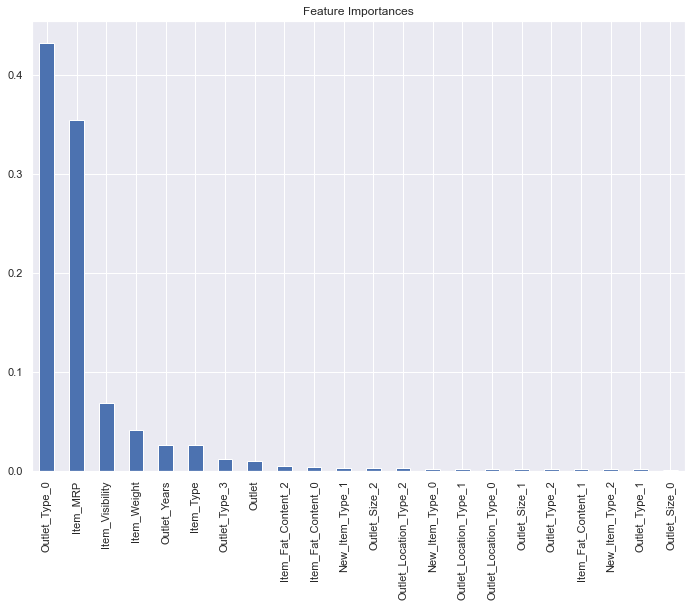

In [72]:
# randomForest Regrssion
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')

Model Report
MSE: 1.0418489584965893e-28
RMSE 1.0207100266464464e-14
CV Score: 0.3314481564242714



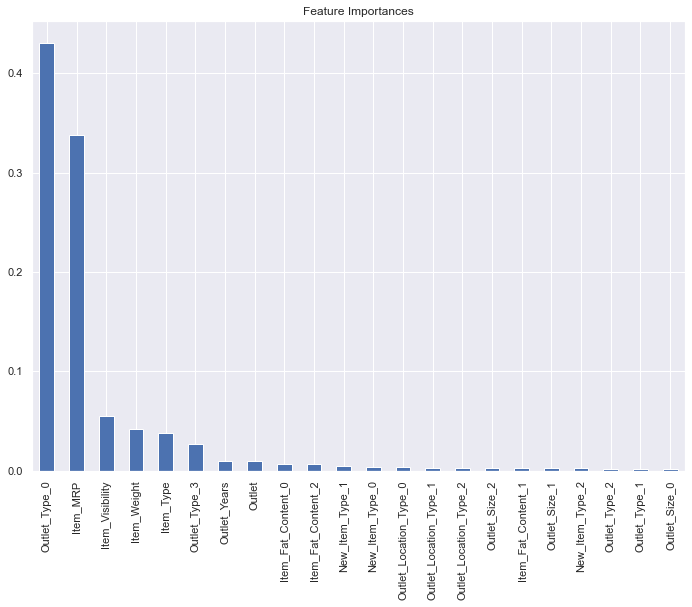

In [73]:
# ExtraTrees Regression
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model,X,y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importances')
print()

### Conclusion:
#### We have fitted Linear regression, Ridge regression, Lasso regression, Decisiontree regressor, RandomForest regressor and ExtraTreesRegressor
#### The best model for our dataset is Linear Regression as it gives 
#### MSE: 0.2880631931292632 
#### RMSE 0.536715188092589
#### CV Score: 0.28902478392410724
#### As it gives less errror and cv_score compare to other models 